In [ ]:
# !pip install spotipy
# !pip install matplotlib
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 53.6 MB/s eta 0:00:00


CONNECTION

In [84]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

connection = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "4PFhDQQc2yhfCUH.root",
  password = "tzNB9UAMnXNidi62",
  database = "sampleTable",

)
mycursor = connection.cursor(buffered=True)

## TABLE CREATION

In [75]:
mycursor.execute("""
CREATE TABLE spotify_tracks_analysis (
  track_name VARCHAR(255),
  artist VARCHAR(255),
  album VARCHAR(255),
  popularity INT,
  duration_minutes FLOAT
)""")
print("done")

done


## RETRIVE DATA

In [76]:
mycursor.execute("""
select * from spotify_tracks_analysis
""")
out = mycursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))
connection.commit()


+-----------------------------------------------+---------------------+--------------------------------------------------------------------------------------+--------------+--------------------+
| track_name                                    | artist              | album                                                                                |   popularity |   duration_minutes |
|-----------------------------------------------+---------------------+--------------------------------------------------------------------------------------+--------------+--------------------|
| Blinding Lights                               | The Weeknd          | After Hours                                                                          |           90 |               3.33 |
| Shape of You                                  | Ed Sheeran          | ÷ (Deluxe)                                                                           |           90 |               3.9  |
| Someone You Loved      

## ANALYSIS

In [77]:
mycursor.execute("""
select * from spotify_tracks_analysis order by popularity desc LIMIT 1
""")
out = mycursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))
connection.commit()


+--------------+------------+---------+--------------+--------------------+
| track_name   | artist     | album   |   popularity |   duration_minutes |
|--------------+------------+---------+--------------+--------------------|
| Starboy      | The Weeknd | Starboy |           91 |               3.84 |
+--------------+------------+---------+--------------+--------------------+


In [78]:
mycursor.execute("""
select avg(popularity) as AVG_POPULARITY from spotify_tracks_analysis
""")
out = mycursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))
connection.commit()


+------------------+
|   AVG_POPULARITY |
|------------------|
|          73.1538 |
+------------------+


In [11]:
mycursor.execute("""
select
case
when popularity>=80 then 'Top Popular Songs'
when popularity>=60   then 'Popular'
else 'Not Popular'
end as Popularity_Category,
count(*) as Count
from spotify_tracks_analysis
group by Popularity_Category
""")
out = mycursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))
connection.commit()


+-----------------------+---------+
| Popularity_Category   |   Count |
|-----------------------+---------|
| Not Popular           |      18 |
| Top Popular Songs     |      72 |
| Popular               |      14 |
+-----------------------+---------+


## Top 10 Songs

In [18]:

mycursor.execute("""
select  distinct * from spotify_tracks_analysis where popularity>=80 order by popularity desc limit 10
""")
out = mycursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))
connection.commit()




+----------------------+------------------+-----------------------------------------+--------------+--------------------+
| track_name           | artist           | album                                   |   popularity |   duration_minutes |
|----------------------+------------------+-----------------------------------------+--------------+--------------------|
| Starboy              | The Weeknd       | Starboy                                 |           91 |               3.84 |
| Blinding Lights      | The Weeknd       | After Hours                             |           90 |               3.33 |
| Shape of You         | Ed Sheeran       | ÷ (Deluxe)                              |           90 |               3.9  |
| Perfect              | Ed Sheeran       | ÷ (Deluxe)                              |           90 |               4.39 |
| Closer               | The Chainsmokers | Closer                                  |           89 |               4.08 |
| lovely (with Khalid) |

## Duplicates

In [54]:
mycursor.execute("""
SELECT * FROM spotify_tracks_analysis
WHERE track_name IS  NULL
  AND artist IS  NULL
  AND album IS  NULL
  AND popularity IS  NULL
  AND duration_minutes IS  NULL;
""")
connection.commit()
out = mycursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))
connection.commit()

## no null values and duplicates


+--------------+----------+---------+--------------+--------------------+
| track_name   | artist   | album   | popularity   | duration_minutes   |
|--------------+----------+---------+--------------+--------------------|
+--------------+----------+---------+--------------+--------------------+


In [56]:
mycursor.execute("""
SELECT distinct * FROM spotify_tracks_analysis
order by duration_minutes desc limit 5
""")
connection.commit()
out = mycursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))
connection.commit()


+--------------+------------------+----------------------------+--------------+--------------------+
| track_name   | artist           | album                      |   popularity |   duration_minutes |
|--------------+------------------+----------------------------+--------------+--------------------|
| Perfect      | Ed Sheeran       | ÷ (Deluxe)                 |           90 |               4.39 |
| Closer       | The Chainsmokers | Closer                     |           89 |               4.08 |
| Lucid Dreams | Juice WRLD       | Goodbye & Good Riddance    |           86 |               4    |
| Heat Waves   | Glass Animals    | Dreamland (+ Bonus Levels) |           18 |               3.98 |
| Shape of You | Ed Sheeran       | ÷ (Deluxe)                 |           90 |               3.9  |
+--------------+------------------+----------------------------+--------------+--------------------+


In [58]:
mycursor.execute("""
SELECT avg(duration_minutes) as Avd_Duration from spotify_tracks_analysis
""")
connection.commit()
out = mycursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))
connection.commit()


+----------------+
|   Avd_Duration |
|----------------|
|        3.34904 |
+----------------+


In [79]:
mycursor.execute("""
SELECT artist ,  count(track_name) as Count_of_songs from spotify_tracks_analysis group by artist order by count(track_name) desc ;
""")
connection.commit()
out = mycursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))
connection.commit()


+---------------------+------------------+
| artist              |   Count_of_songs |
|---------------------+------------------|
| The Weeknd          |               12 |
| Ed Sheeran          |               12 |
| Post Malone         |               10 |
| Harry Styles        |               10 |
| Drake               |                6 |
| The Kid LAROI       |                6 |
| Glass Animals       |                6 |
| Tones And I         |                6 |
| Lewis Capaldi       |                6 |
| The Chainsmokers    |                6 |
| The Killers         |                4 |
| Shawn Mendes        |                4 |
| Dua Lipa            |                4 |
| Panic! At The Disco |                4 |
| Juice WRLD          |                4 |
| Billie Eilish       |                4 |
+---------------------+------------------+


In [65]:
#Deleting duplicates

mycursor.execute("""WITH spotify AS (
    SELECT track_name, artist, album, popularity, duration_minutes,
           ROW_NUMBER() OVER (PARTITION BY track_name ORDER BY popularity DESC) AS ROWNUM
    FROM spotify_tracks_analysis
)
DELETE FROM spotify_tracks
WHERE track_name IN (
    SELECT track_name
    FROM spotify
    WHERE ROWNUM > 1
);

""")
connection.commit()



In [80]:
mycursor.execute("""
SELECT * from spotify_tracks_analysis  limit 1;
""")
connection.commit()
out = mycursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))
connection.commit()


+-----------------+------------+-------------+--------------+--------------------+
| track_name      | artist     | album       |   popularity |   duration_minutes |
|-----------------+------------+-------------+--------------+--------------------|
| Blinding Lights | The Weeknd | After Hours |           90 |               3.33 |
+-----------------+------------+-------------+--------------+--------------------+


## Data Base to Data Frame

In [82]:
query = "SELECT * FROM spotify_tracks_analysis"  # Replace with your actual table name

# Load into DataFrame
df = pd.read_sql(query, con=connection,columns=['Track Name','Artist','Albums','Popularity','Duration'])
df.to_csv("spotify_tracks_analysis.csv")

<ipython-input-82-d6f41fc66b79>:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection,columns=['Track Name','Artist','Albums','Popularity','Duration'])


In [28]:
list(df.shape)
df.describe()
df

,track_name,artist,album,popularity,duration_minutes
0,Blinding Lights,The Weeknd,After Hours,90,3.33
1,Shape of You,Ed Sheeran,÷ (Deluxe),90,3.90
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,88,3.04
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Spider-Man: Into the Spider-Verse (Soundtrack ...,84,2.63
4,Starboy,The Weeknd,Starboy,91,3.84
...,...,...,...,...,...
99,STAY (with Justin Bieber),The Kid LAROI,F*CK LOVE 3: OVER YOU,13,2.36
100,Dance Monkey,Tones And I,Dance Monkey (Stripped Back) / Dance Monkey,76,3.49
101,Heat Waves,Glass Animals,Dreamland (+ Bonus Levels),18,3.98
102,Perfect,Ed Sheeran,÷ (Deluxe),90,4.39


## top 10 tracks

<Axes: ylabel='track_name'>

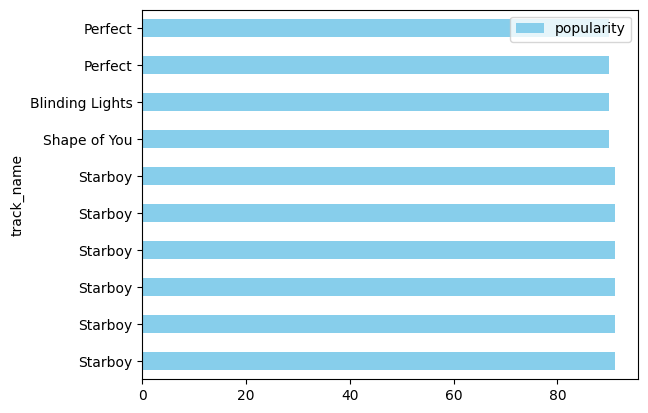

In [29]:
top_tracks = df.sort_values(by='popularity', ascending=False).head(10)
top_tracks.plot(kind='barh', x='track_name', y='popularity', color='skyblue')


## Distribution of track

<Axes: ylabel='Frequency'>

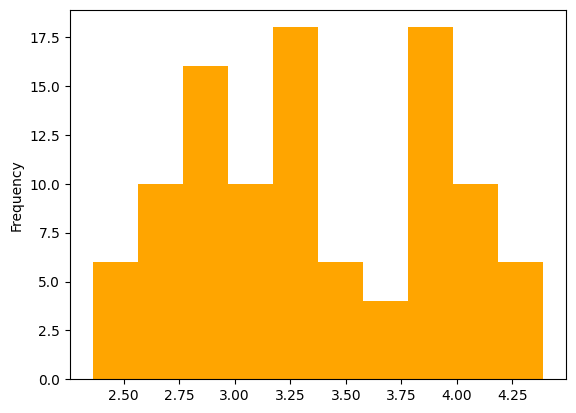

In [31]:
df['duration_minutes'].plot(kind='hist', bins=10, color='orange')


## Per Artist Popularity

<Axes: xlabel='artist'>

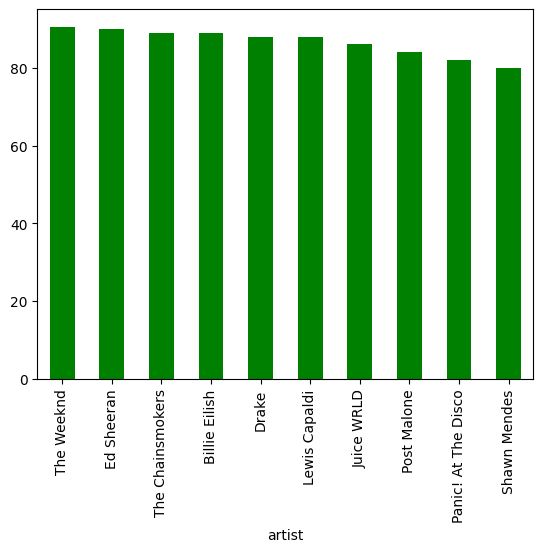

In [33]:
artist_avg = df.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)
artist_avg.plot(kind='bar', color='green')


## Top tracks per atrist

<Axes: xlabel='artist'>

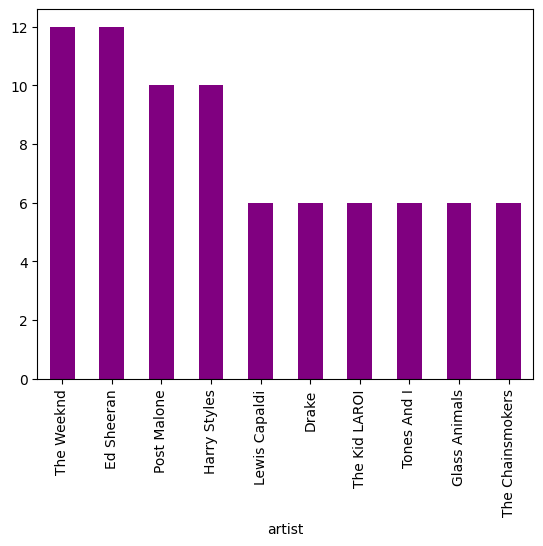

In [34]:
artist_count = df['artist'].value_counts().head(10)
artist_count.plot(kind='bar', color='purple')


## Duration X Popularity

<Axes: xlabel='duration_minutes', ylabel='popularity'>

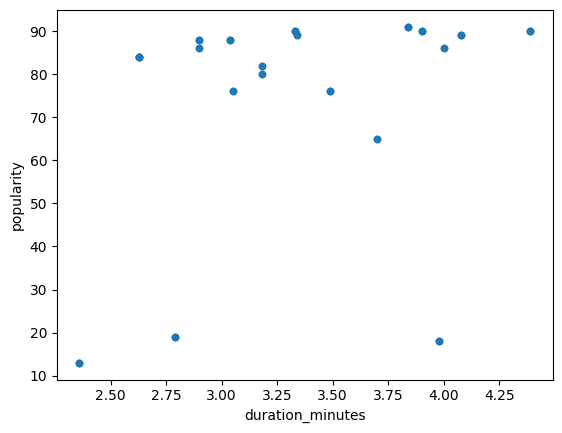

In [37]:
df.plot(kind='scatter', x='duration_minutes', y='popularity', alpha=0.6)


## Popularity Distribution

<Axes: >

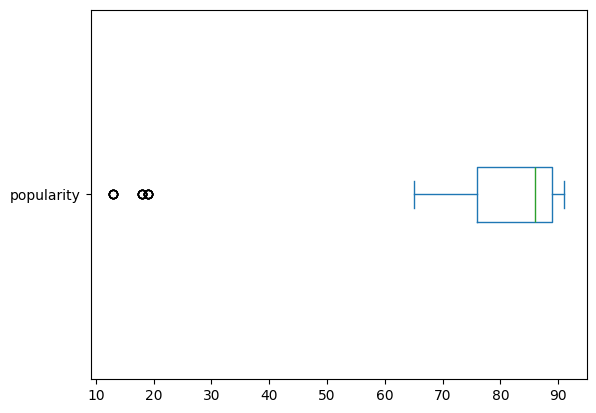

In [38]:
df['popularity'].plot(kind='box', vert=False)


## Heat Map

<Axes: xlabel='album', ylabel='artist'>

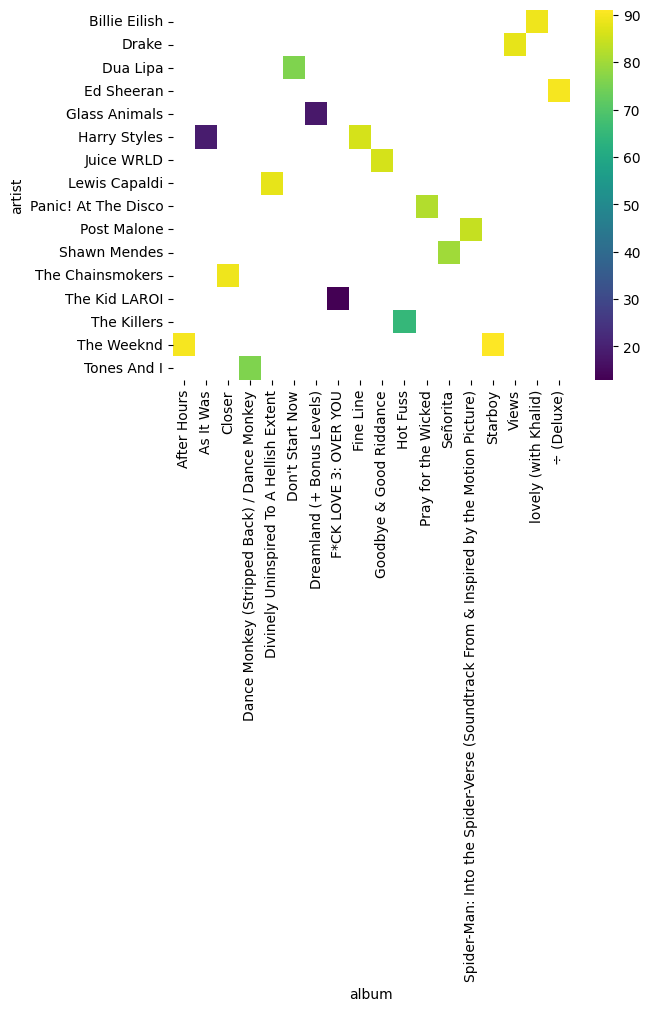

In [39]:
import seaborn as sns
pivot = df.pivot_table(index='artist', columns='album', values='popularity', aggfunc='mean')
sns.heatmap(pivot, cmap='viridis')


## Treand

<Axes: xlabel='duration_minutes', ylabel='popularity'>

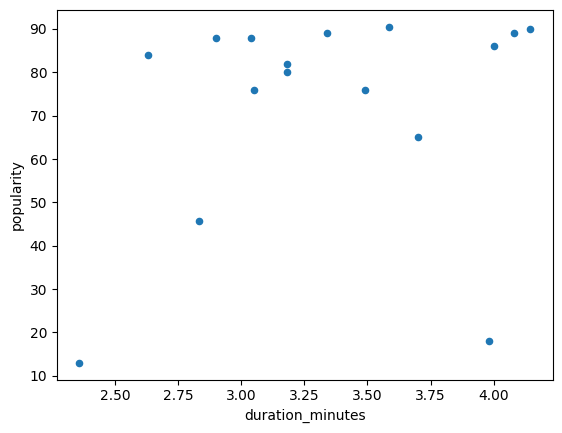

In [40]:
artist_stats = df.groupby('artist')[['duration_minutes', 'popularity']].mean()
artist_stats.plot(kind='scatter', x='duration_minutes', y='popularity')


## Analysis After Getting Data from CSV

In [88]:

# Load into DataFrame
df = pd.read_csv('/content/spotify_tracks_analysis.csv',index_col=0)
df

,track_name,artist,album,popularity,duration_minutes
0,Blinding Lights,The Weeknd,After Hours,90,3.33
1,Shape of You,Ed Sheeran,÷ (Deluxe),90,3.90
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,88,3.04
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Spider-Man: Into the Spider-Verse (Soundtrack ...,84,2.63
4,Starboy,The Weeknd,Starboy,91,3.84
...,...,...,...,...,...
99,STAY (with Justin Bieber),The Kid LAROI,F*CK LOVE 3: OVER YOU,13,2.36
100,Dance Monkey,Tones And I,Dance Monkey (Stripped Back) / Dance Monkey,76,3.49
101,Heat Waves,Glass Animals,Dreamland (+ Bonus Levels),18,3.98
102,Perfect,Ed Sheeran,÷ (Deluxe),90,4.39
